# **Housing Prices Competition**

## Contents:
1. **X, y Dataframes Creation**
    * Import Libraries
    * Read the data
2. **X, y Summary**
    * Correlation between features and target on heatmap
3. **Data Cleaning**
    * Remove the columns with more than half missing values
    * Drop columns with most of the rows having only one category
4. **Feature Engineering**
    * Creating feature for 'Age' of house when sold
    * Adding features 'Garage', 'Fireplace' and 'Basement'
    * Replacing ordered categories with numbers
5. **Data Visualization**
    * Distribution of top 5 features correlated with Sales Price
6. **Feature Selection**
    * Selected Features
7. **Model Creation**
    * Preprocessing
    * Visualize Pipeline
    * Grid Search
8. **Training and Testing Model**
    * Best Parameters

# 1) X, y Dataframes Creation

## Import Libraries

In [1]:
# Data Analytics Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

In [2]:
# Machine Learning Libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from math import ceil

In [3]:
# Update some default parameters for plotting throughout the notebook
plt.rcParams.update({'font.size': 12, 'xtick.labelsize':15, 'ytick.labelsize':15, 'axes.labelsize':15, 'axes.titlesize':20})

In [4]:
# List all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [5]:
# Read the data
Xy = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv', index_col='Id')
X_test = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv', index_col='Id')

# Remove rows with missing target
Xy = Xy.dropna(axis=0, subset=['SalePrice'])

# Separate target from predictors
X = Xy.drop(['SalePrice'], axis=1)
y = Xy.SalePrice

# 2) X, y Summary

In [6]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 30)

In [7]:
info = pd.DataFrame(X.dtypes, columns=['Dtype'])
info['Unique'] = X.nunique().values
info['Null'] = X.isnull().sum().values
info

Dtype  Unique  Null
MSSubClass       int64      15     0
MSZoning        object       5     0
LotFrontage    float64     110   259
LotArea          int64    1073     0
Street          object       2     0
Alley           object       2  1369
LotShape        object       4     0
LandContour     object       4     0
Utilities       object       2     0
LotConfig       object       5     0
LandSlope       object       3     0
Neighborhood    object      25     0
Condition1      object       9     0
Condition2      object       8     0
BldgType        object       5     0
HouseStyle      object       8     0
OverallQual      int64      10     0
OverallCond      int64       9     0
YearBuilt        int64     112     0
YearRemodAdd     int64      61     0
RoofStyle       object       6     0
RoofMatl        object       8     0
Exterior1st     object      15     0
Exterior2nd     object      16     0
MasVnrType      object       4     8
MasVnrArea     float64     327     8
ExterQual       object       4     0
ExterCond       object       5     0
Foundation      object       6     0
BsmtQual        object       4    37
BsmtCond        object       4    37
BsmtExposure    object       4    38
BsmtFinType1    object       6    37
BsmtFinSF1       int64     637     0
BsmtFinType2    object       6    38
BsmtFinSF2       int64     144     0
BsmtUnfSF        int64     780     0
TotalBsmtSF      int64     721     0
Heating         object       6     0
HeatingQC       object       5     0
CentralAir      object       2     0
Electrical      object       5     1
1stFlrSF         int64     753     0
2ndFlrSF         int64     417     0
LowQualFinSF     int64      24     0
GrLivArea        int64     861     0
BsmtFullBath     int64       4     0
BsmtHalfBath     int64       3     0
FullBath         int64       4     0
HalfBath         int64       3     0
BedroomAbvGr     int64       8     0
KitchenAbvGr     int64       4     0
KitchenQual     object       4     0
TotRmsAbvGrd     int64      12     0
Functional      object       7     0
Fireplaces       int64       4     0
FireplaceQu     object       5   690
GarageType      object       6    81
GarageYrBlt    float64      97    81
GarageFinish    object       3    81
GarageCars       int64       5     0
GarageArea       int64     441     0
GarageQual      object       5    81
GarageCond      object       5    81
PavedDrive      object       3     0
WoodDeckSF       int64     274     0
OpenPorchSF      int64     202     0
EnclosedPorch    int64     120     0
3SsnPorch        int64      20     0
ScreenPorch      int64      76     0
PoolArea         int64       8     0
PoolQC          object       3  1453
Fence           object       4  1179
MiscFeature     object       4  1406
MiscVal          int64      21     0
MoSold           int64      12     0
YrSold           int64       5     0
SaleType        object       9     0
SaleCondition   object       6     0

In [8]:
X.dtypes.value_counts()

object     43
int64      33
float64     3
dtype: int64

In [9]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Correlation between features and target on heatmap

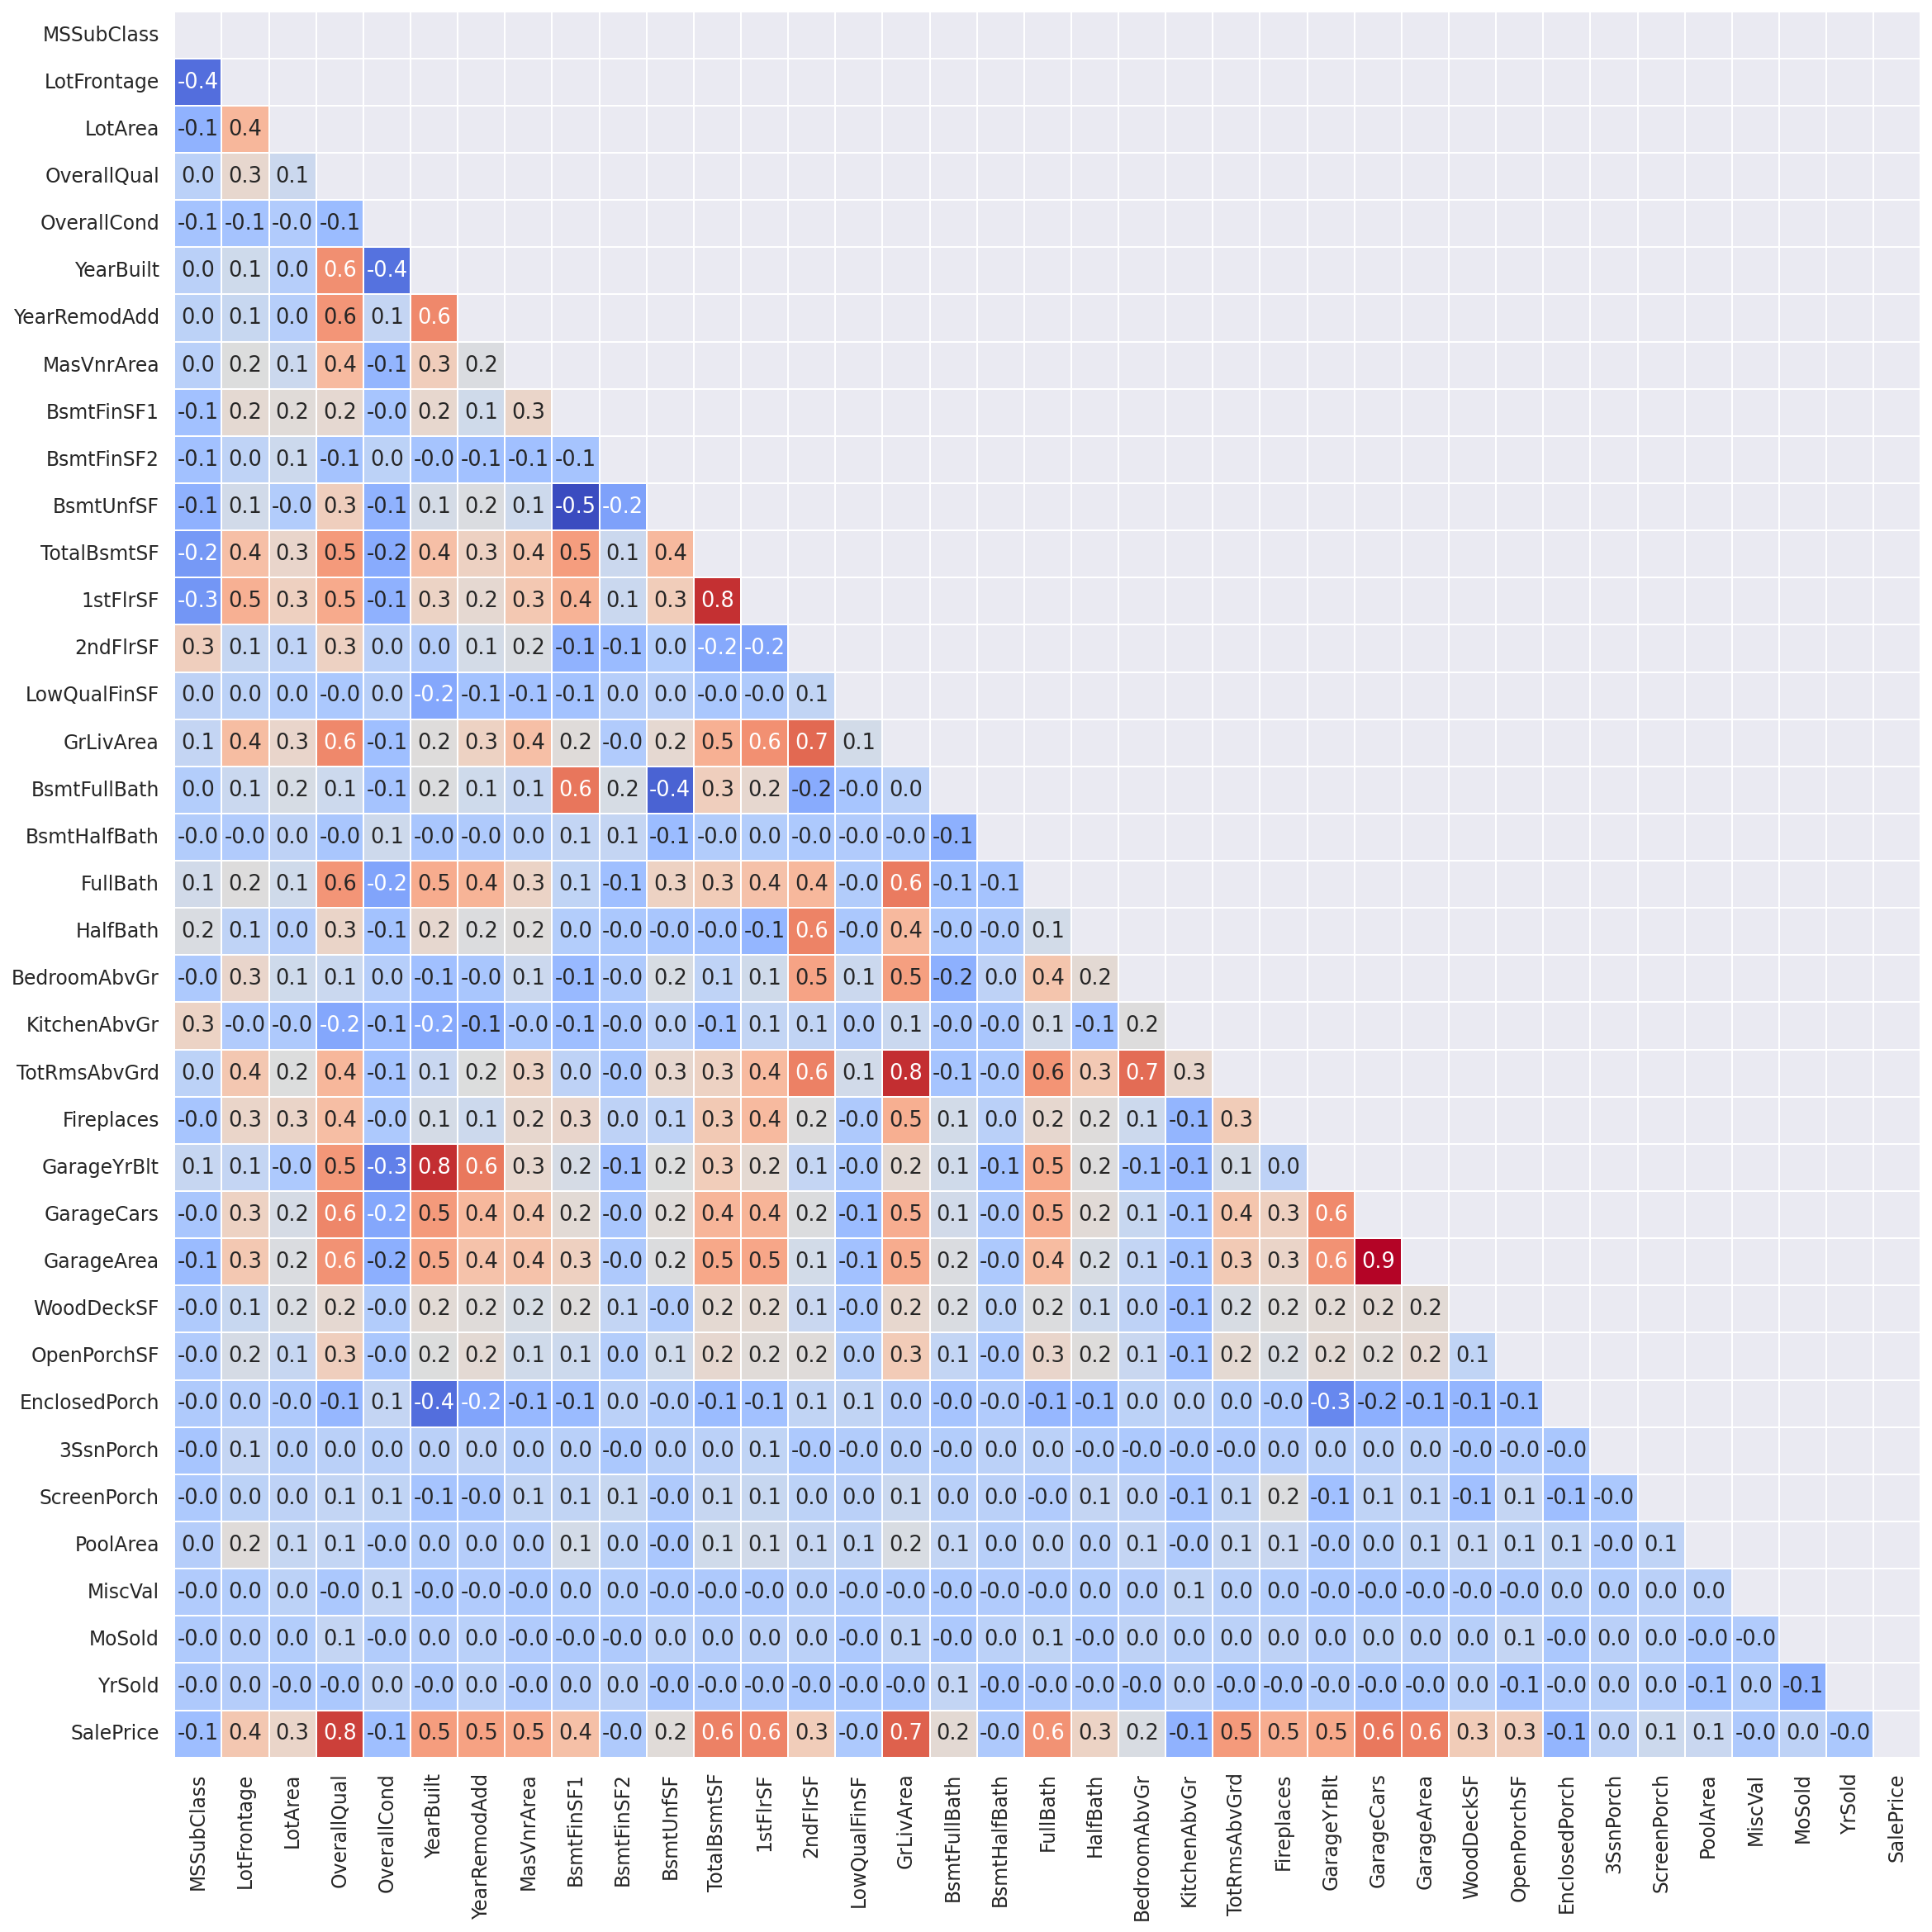

In [10]:
correlation_matrix = Xy.corr()

# Returns copy of array with upper part of the triangle (which will be masked/hidden)
mask = np.triu(correlation_matrix.corr())

sns.set(font_scale=1.1)
plt.figure(figsize=(20, 20), dpi=140)
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm', 
            square=True, mask=mask, linewidths=1, cbar=False)
plt.show()

# 3) Data Cleaning

In [11]:
# Total rows/observations/houses in Training data and Test data
print(len(X),len(X_test))

1460 1459


## Remove the columns with more than half missing values

In [12]:
# Making function so that we can reuse it in later stages as well
def show_null_values(X, X_test):
    # Missing values in each column of Training and Testing data
    null_values_train = X.isnull().sum()
    null_values_test = X_test.isnull().sum()

    # Making DataFrame for combining training and testing missing values
    null_values = pd.DataFrame(null_values_train)
    null_values['Test Data'] = null_values_test.values
    null_values.rename(columns = {0:'Train Data'}, inplace = True)

    # Showing only columns having missing values and sorting them
    null_values = null_values.loc[(null_values['Train Data']!=0) | (null_values['Test Data']!=0)]
    null_values = null_values.sort_values(by=['Train Data','Test Data'],ascending=False)
    
    print("Total miising values:",null_values.sum(),sep='\n')
    
    return null_values

In [13]:
show_null_values(X, X_test)

Total miising values:
Train Data    6965
Test Data     7000
dtype: int64


Train Data  Test Data
PoolQC              1453       1456
MiscFeature         1406       1408
Alley               1369       1352
Fence               1179       1169
FireplaceQu          690        730
LotFrontage          259        227
GarageYrBlt           81         78
GarageFinish          81         78
GarageQual            81         78
GarageCond            81         78
GarageType            81         76
BsmtExposure          38         44
BsmtFinType2          38         42
BsmtCond              37         45
BsmtQual              37         44
BsmtFinType1          37         42
MasVnrType             8         16
MasVnrArea             8         15
Electrical             1          0
MSZoning               0          4
Utilities              0          2
BsmtFullBath           0          2
BsmtHalfBath           0          2
Functional             0          2
Exterior1st            0          1
Exterior2nd            0          1
BsmtFinSF1             0          1
BsmtFinSF2             0          1
BsmtUnfSF              0          1
TotalBsmtSF            0          1
KitchenQual            0          1
GarageCars             0          1
GarageArea             0          1
SaleType               0          1

In [14]:
# Columns with missing values in more than half number of rows
null_cols = [col for col in X.columns if X[col].isnull().sum() > len(X)/2]
null_cols

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [15]:
X.drop(null_cols,axis=1,inplace=True)
X_test.drop(null_cols,axis=1,inplace=True)

In [16]:
# Total missing values after removing columns with more than half missing values
print("Total missing values:")
print("Training data\t",X.isnull().sum().sum())
print("Testing data\t",X_test.isnull().sum().sum())

Total missing values:
Training data	 1558
Testing data	 1615


## Data Visualization (Categorical Data)

In [17]:
object_cols = X.select_dtypes('object').columns
len(object_cols)

39

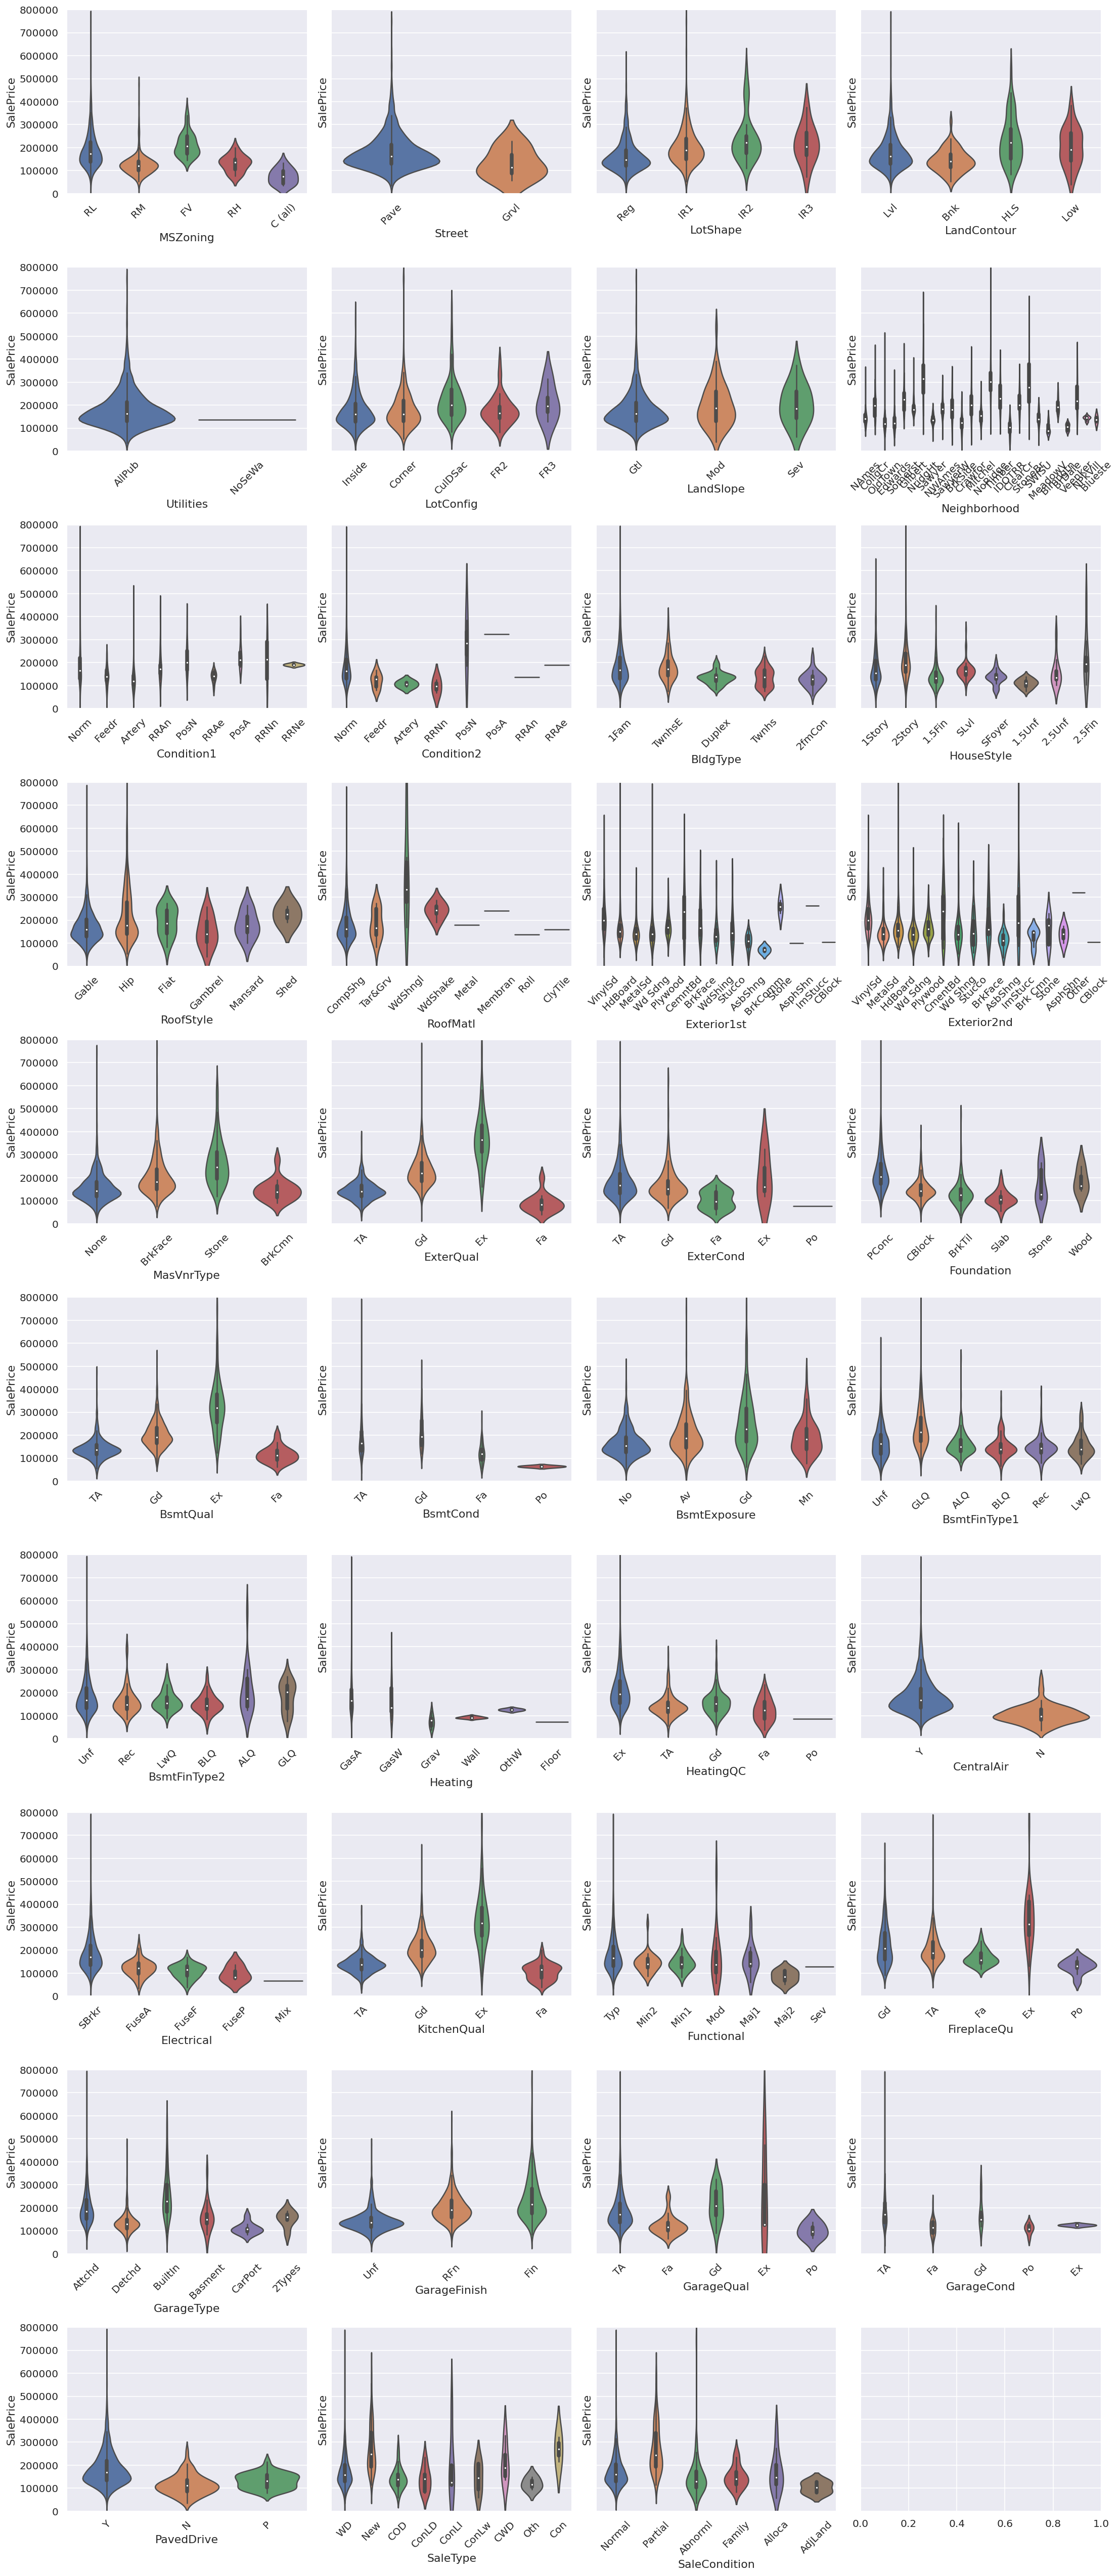

In [18]:
fig, ax = plt.subplots(nrows=ceil(len(object_cols) / 4), ncols=4, figsize=(22, 1.4*len(object_cols)), sharey=True, dpi=120)

for col, subplot in zip(object_cols, ax.flatten()):
    freq = X[col].value_counts()
    subplot.ticklabel_format(style='plain')
    plt.ylim([0, 800000])
    plt.subplots_adjust(wspace=.1,hspace=.4)
    for tick in subplot.get_xticklabels():
        tick.set_rotation(45)
    sns.violinplot(data=X, x=col, y=y, order=freq.index, ax=subplot)

## Drop columns with most of the rows having only one category

In [19]:
# From above violin plots, 'Utilities' feature seems to have mostly one category.
# Lets confirm that using value_counts for each of its categories.
X.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [20]:
X_test.Utilities.value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [21]:
X.drop('Utilities',axis=1,inplace=True)
X_test.drop('Utilities',axis=1,inplace=True)

# 4) Feature Engineering

## 4.1) Creating New Numerical Features

### Age of House when sold

In [22]:
X['Age'] = X['YrSold']-X['YearBuilt']
X_test['Age'] = X_test['YrSold']-X_test['YearBuilt']

### Years between Remodeling and sales

In [23]:
X['AgeRemodel'] = X['YrSold']-X['YearRemodAdd']
X_test['AgeRemodel'] = X_test['YrSold']-X_test['YearRemodAdd']

In [24]:
year_cols = ['YrSold','YearBuilt','AgeRemodel', 'Age']
X.loc[:,year_cols].head(2)

YrSold  YearBuilt  AgeRemodel  Age
Id                                    
1     2008       2003           5    5
2     2007       1976          31   31

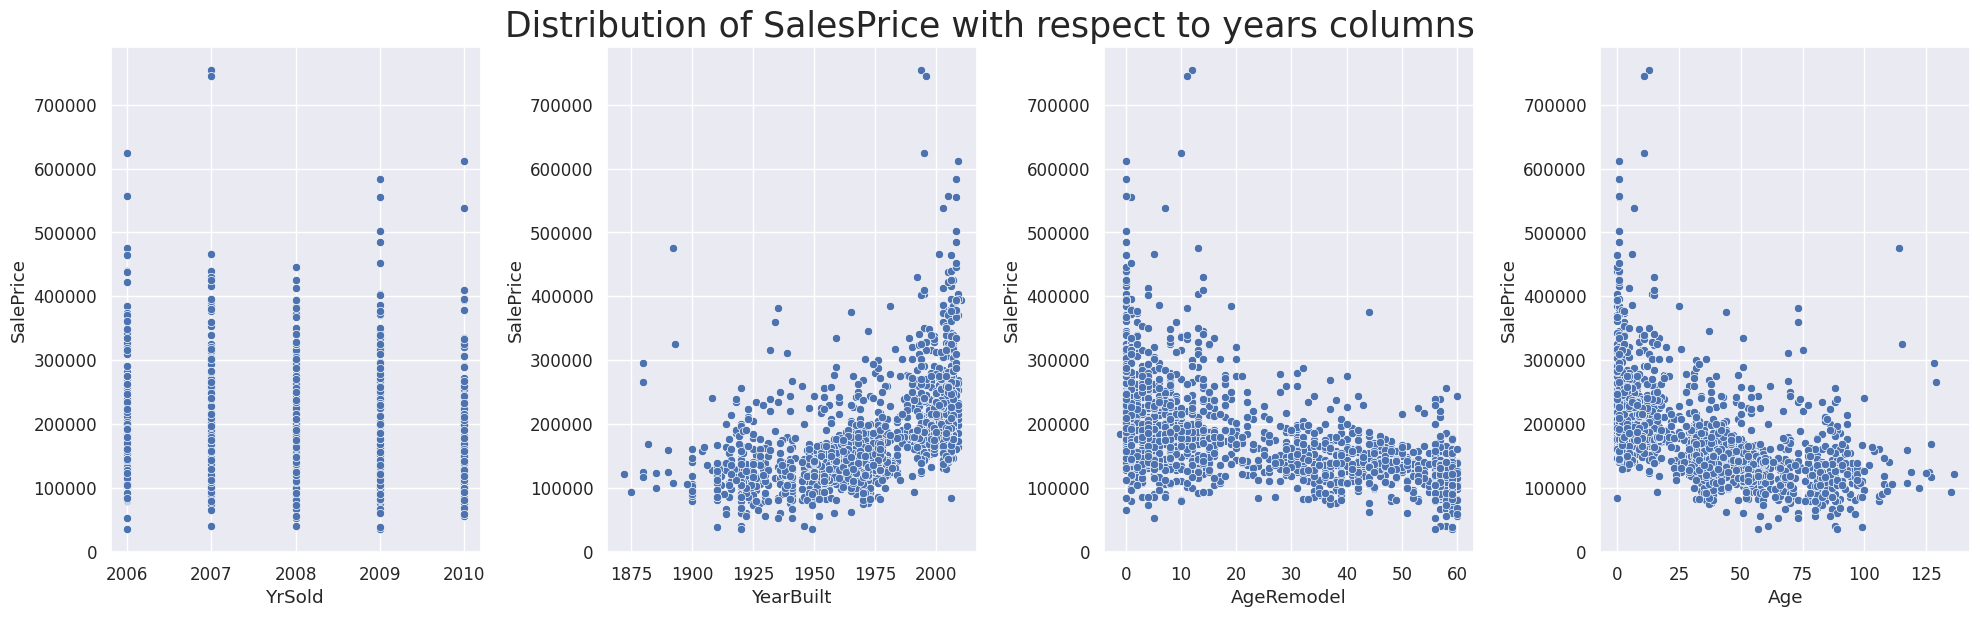

In [25]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6), dpi=100)

# scatterplot
for col,i in zip(year_cols, [0,1,2,3]):
    sns.scatterplot(x=X[col], y=y, ax=ax[i])

fig.tight_layout()
fig.text(0.5, 1, 'Distribution of SalesPrice with respect to years columns', size=25, ha="center", va="center")
plt.show()

In [26]:
# Correlation of year columns with SalesPrice
X_years_y=X.loc[:,year_cols]
X_years_y['SalesPrice']=y
X_years_y.head()
X_years_y.corr().SalesPrice

YrSold       -0.028923
YearBuilt     0.522897
AgeRemodel   -0.509079
Age          -0.523350
SalesPrice    1.000000
Name: SalesPrice, dtype: float64

## 4.2) Creating New Boolean Features

### Remodel column: Boolean Datatype
* False (for 764 houses having Remodel date same as construction date i.e. no modeling or additions)
* True (for 696 houses with modeling or additions done)

In [27]:
(X['YearRemodAdd']==X['YearBuilt']).sum()

764

In [28]:
(X['YearRemodAdd']!=X['YearBuilt']).sum()

696

In [29]:
X['Remodel'] = X['YearRemodAdd']!=X['YearBuilt']
X_test['Remodel'] = X_test['YearRemodAdd']!=X_test['YearBuilt']
remodel_cols = ['Remodel','YearBuilt','YearRemodAdd']
X.loc[:,remodel_cols].head(4)

Remodel  YearBuilt  YearRemodAdd
Id                                  
1     False       2003          2003
2     False       1976          1976
3      True       2001          2002
4      True       1915          1970

### Garage, Fireplace, Basement and Masonry

### Garage column: Boolean Datatype
* False (for 81 rows having missing values in columns GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond)
* True (for all others rows)

In [30]:
X['Garage'] = X['GarageQual'].notnull()
X_test['Garage'] = X_test['GarageQual'].notnull()

### Fireplace column: Boolean Datatype
* False (for 690 rows having missing values in column FireplaceQu)
* True (for all others rows)

In [31]:
X['Fireplace'] = X['FireplaceQu'].notnull()
X_test['Fireplace'] = X_test['FireplaceQu'].notnull()

### Basement column: Boolean Datatype
* False (for 37 rows having missing values in columns BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2)
* True (for all others rows)

In [32]:
X['Bsmt'] = X['BsmtQual'].notnull()
X_test['Bsmt'] = X_test['BsmtQual'].notnull()

### Masonry veneer column: Boolean Datatype
* False (for 8 rows having missing values in columns MasVnrType, MasVnrArea)
* True (for all others rows)

In [33]:
X['Masonry'] = X['MasVnrType'].notnull()
X_test['Masonry'] = X_test['MasVnrType'].notnull()

In [34]:
X.dtypes.value_counts()

object     38
int64      35
bool        5
float64     3
dtype: int64

## Converting boolean columns [False,True] into numerical columns [0,1]

In [35]:
bool_cols = X.select_dtypes(include=['bool']).columns
X[bool_cols].nunique()

Remodel      2
Garage       2
Fireplace    2
Bsmt         2
Masonry      2
dtype: int64

In [36]:
X.loc[:,bool_cols] = X.loc[:,bool_cols].replace([False,True], [0,1])
X_test.loc[:,bool_cols] = X_test.loc[:,bool_cols].replace([False,True], [0,1])

In [37]:
X.loc[:,bool_cols].head(4)

Remodel  Garage  Fireplace  Bsmt  Masonry
Id                                           
1         0       1          0     1        1
2         0       1          1     1        1
3         1       1          1     1        1
4         1       1          1     1        1

## 4.3) Ordered Categorical Columns

### Replacing ordered categories with numbers

In [38]:
object_cols = X.select_dtypes(include=['object']).columns
# Categorical Columns with number of unuque categoies in them 
X[object_cols].nunique().sort_values()

Street            2
CentralAir        2
GarageFinish      3
LandSlope         3
PavedDrive        3
BsmtQual          4
ExterQual         4
MasVnrType        4
KitchenQual       4
BsmtCond          4
BsmtExposure      4
LandContour       4
LotShape          4
HeatingQC         5
FireplaceQu       5
GarageQual        5
Electrical        5
GarageCond        5
LotConfig         5
ExterCond         5
BldgType          5
MSZoning          5
GarageType        6
Heating           6
Foundation        6
BsmtFinType1      6
RoofStyle         6
BsmtFinType2      6
SaleCondition     6
Functional        7
RoofMatl          8
HouseStyle        8
Condition2        8
SaleType          9
Condition1        9
Exterior1st      15
Exterior2nd      16
Neighborhood     25
dtype: int64

Read 'data_description.txt' from the input files. Some columns were having **levels of quality, condition or finish** in words (i.e. string format). These columns can be used as ordinal columns (i.e. ordered category columns).

In [39]:
ordinal_cols = [i for i in object_cols if ('QC' in i) or ('Qu' in i) or ('Fin' in i) or ('Cond' in i) and ('Condition' not in i)]
print("Column Names: [Unique Categories in each column]")
{col:[*X[col].unique()] for col in ordinal_cols}

Column Names: [Unique Categories in each column]


{'ExterQual': ['Gd', 'TA', 'Ex', 'Fa'],
 'ExterCond': ['TA', 'Gd', 'Fa', 'Po', 'Ex'],
 'BsmtQual': ['Gd', 'TA', 'Ex', nan, 'Fa'],
 'BsmtCond': ['TA', 'Gd', nan, 'Fa', 'Po'],
 'BsmtFinType1': ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'],
 'BsmtFinType2': ['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'],
 'HeatingQC': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
 'KitchenQual': ['Gd', 'TA', 'Ex', 'Fa'],
 'FireplaceQu': [nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'],
 'GarageFinish': ['RFn', 'Unf', 'Fin', nan],
 'GarageQual': ['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'],
 'GarageCond': ['TA', 'Fa', nan, 'Gd', 'Po', 'Ex']}

In [40]:
X.loc[:,ordinal_cols] = X.loc[:,ordinal_cols].fillna('NA')
X_test.loc[:,ordinal_cols] = X_test.loc[:,ordinal_cols].fillna('NA')
# Don't forget to do all the preprocessings done on training data to testing data

### 1] Columns with similar ordered categories [Poor<Fair<Typical/Average<Good<Excellent]

In [41]:
ordinal_cols1 = [i for i in object_cols if ('QC' in i) or ('Qu' in i) or ('Cond' in i) and ('Condition' not in i)]
print(*ordinal_cols1, sep=', ')

ExterQual, ExterCond, BsmtQual, BsmtCond, HeatingQC, KitchenQual, FireplaceQu, GarageQual, GarageCond


In [42]:
X.loc[:,ordinal_cols1] = X.loc[:,ordinal_cols1].replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4,5])
X_test.loc[:,ordinal_cols1] = X_test.loc[:,ordinal_cols1].replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],[0,1,2,3,4,5])

### 2] Columns with similar ordered categories [No Garage/Basement<Unfinished<Rough Finished<Finished,etc]

In [43]:
ordinal_cols2 = ['BsmtFinType1', 'BsmtFinType2']

In [44]:
X.loc[:,ordinal_cols2] = X.loc[:,ordinal_cols2].replace(['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], [0,1,2,3,4,5,6])
X_test.loc[:,ordinal_cols2] = X_test.loc[:,ordinal_cols2].replace(['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],[0,1,2,3,4,5,6])

### 3] Column with ordered categories [No Basement<No Exposure<Mimimum Exposure<Average Exposure<Good Exposure]

In [45]:
ordinal_cols3 = ['BsmtExposure']

In [46]:
X.loc[:,ordinal_cols3] = X.loc[:,ordinal_cols3].replace(['NA', 'No', 'Mn', 'Av', 'Gd'], [0,1,2,3,4])
X_test.loc[:,ordinal_cols3] = X_test.loc[:,ordinal_cols3].replace(['NA', 'No', 'Mn', 'Av', 'Gd'], [0,1,2,3,4])

### 4] Column with ordered categories [Regular<Slightly irregular<Moderately Irregular<Irregular]

In [47]:
ordinal_cols4 = ['LotShape']

In [48]:
X.loc[:,ordinal_cols4] = X.loc[:,ordinal_cols4].replace(['Reg', 'IR1', 'IR2', 'IR3'], [0,1,2,3])
X_test.loc[:,ordinal_cols4] = X_test.loc[:,ordinal_cols4].replace(['Reg', 'IR1', 'IR2', 'IR3'], [0,1,2,3])

### 5] Column with ordered categories [No Garage<Unfinished<Rough Finished<Finished]

In [49]:
ordinal_cols5 = ['GarageFinish']

In [50]:
X.loc[:,ordinal_cols5] = X.loc[:,ordinal_cols5].replace(['NA', 'Unf', 'RFn', 'Fin'], [0,1,2,3])
X_test.loc[:,ordinal_cols5] = X_test.loc[:,ordinal_cols5].replace(['NA', 'Unf', 'RFn', 'Fin'], [0,1,2,3])

# 5) Data Visualization

In [51]:
X_y = X.copy()
X_y['SalesPrice'] = y
X_y.head(2)

MSSubClass MSZoning  LotFrontage  LotArea Street  LotShape LandContour  \
Id                                                                           
1           60       RL         65.0     8450   Pave         0         Lvl   
2           20       RL         80.0     9600   Pave         0         Lvl   

   LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
Id                                                                              
1     Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
2        FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   

    OverallQual  ...  ScreenPorch  PoolArea  MiscVal MoSold YrSold SaleType  \
Id               ...                                                          
1             7  ...            0         0        0      2   2008       WD   
2             6  ...            0         0        0      5   2007       WD   

   SaleCondition Age  AgeRemodel  Remodel  Garage Fireplace  Bsmt  Masonry  \
Id                                                                           
1         Normal   5           5        0       1         0     1        1   
2         Normal  31          31        0       1         1     1        1   

    SalesPrice  
Id              
1       208500  
2       181500  

[2 rows x 82 columns]

Now, we will create a function to automate plotting 4 types of plot for a single numerical variable.

In [52]:
def univariate_numerical_plot(df, x):
    fig, ax = plt.subplots(1, 4, figsize=(20, 6), dpi=100)
    
    # 0) histogram
    sns.histplot(data=df, x=x, kde=True, ax=ax[0], bins=min(df[x].nunique(),10), kde_kws={'bw_adjust':3})
    sns.despine(bottom=True, left=True)
    ax[0].set_title('histogram')
    ax[0].set_xlabel(xlabel=x)
    
    # 1) box plot
    sns.boxplot(data=df, y=x, ax=ax[1])
    ax[1].set_title('boxplot')
    ax[1].set_ylabel(ylabel=x)
    
    # 2) probability plot
    plt.sca(ax[2])
    stats.probplot(df[x], dist = "norm", plot = plt)
    
    # 3) scatterplot
    sns.scatterplot(x=df[x], y=y, ax=ax[3])
    
    fig.tight_layout()
    fig.text(0.5, 1, f'Distribution of {x}', size=25, ha="center", va="center")
    plt.show()

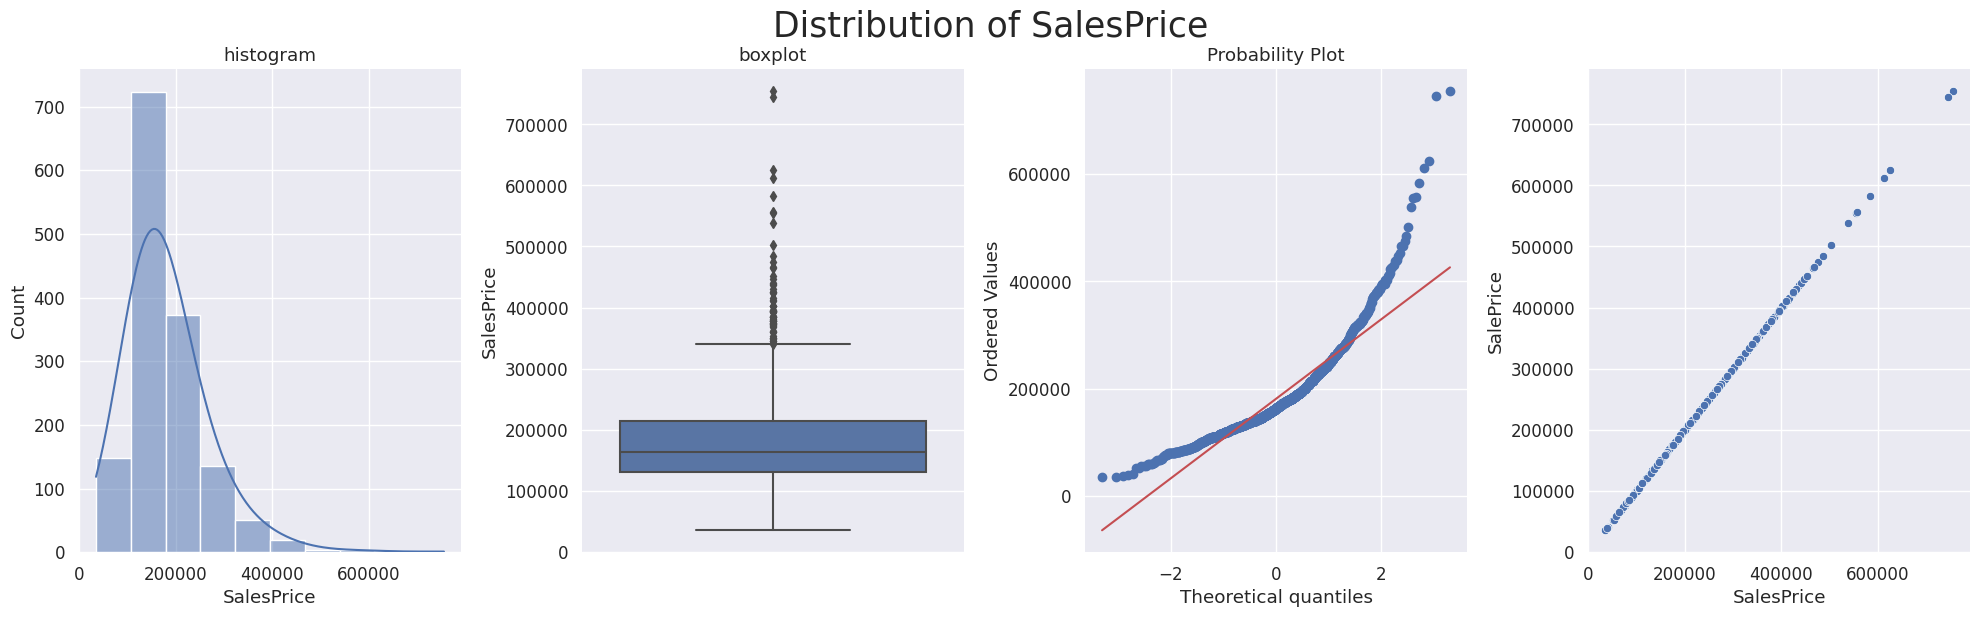

In [53]:
# Check distribution of target variable
univariate_numerical_plot(X_y,'SalesPrice')

As many features are available for plotting, we won't plot all of them. We can focus on features having higher linear correaltion (which is calculated in the section below).

## Correlation of X with y

In [54]:
corr_s = X_y.corr(method='spearman')
corr_with_price = pd.DataFrame(corr_s['SalesPrice'])

corr_with_price.rename(columns = {'SalesPrice':'spearman'}, inplace = True)

corr_p = X_y.corr(method='pearson')
corr_with_price['pearson']=corr_p['SalesPrice']

corr_with_price = corr_with_price.sort_values('pearson',ascending=False)
round(corr_with_price,2)

spearman  pearson
SalesPrice         1.00     1.00
OverallQual        0.81     0.79
GrLivArea          0.73     0.71
ExterQual          0.68     0.68
KitchenQual        0.67     0.66
GarageCars         0.69     0.64
GarageArea         0.65     0.62
TotalBsmtSF        0.60     0.61
1stFlrSF           0.58     0.61
BsmtQual           0.68     0.59
FullBath           0.64     0.56
GarageFinish       0.63     0.55
TotRmsAbvGrd       0.53     0.53
YearBuilt          0.65     0.52
FireplaceQu        0.54     0.52
YearRemodAdd       0.57     0.51
GarageYrBlt        0.59     0.49
MasVnrArea         0.42     0.48
Fireplace          0.53     0.47
Fireplaces         0.52     0.47
HeatingQC          0.49     0.43
BsmtFinSF1         0.30     0.39
BsmtExposure       0.30     0.35
LotFrontage        0.41     0.35
WoodDeckSF         0.35     0.32
2ndFlrSF           0.29     0.32
OpenPorchSF        0.48     0.32
BsmtFinType1       0.36     0.30
HalfBath           0.34     0.28
GarageQual         0.35     0.27
LotShape           0.32     0.27
LotArea            0.46     0.26
GarageCond         0.34     0.26
Garage             0.30     0.24
BsmtFullBath       0.23     0.23
BsmtUnfSF          0.19     0.21
BsmtCond           0.27     0.21
BedroomAbvGr       0.23     0.17
Bsmt               0.20     0.15
ScreenPorch        0.10     0.11
PoolArea           0.06     0.09
MoSold             0.07     0.05
3SsnPorch          0.07     0.04
ExterCond          0.01     0.02
BsmtFinType2       0.04    -0.01
BsmtFinSF2        -0.04    -0.01
BsmtHalfBath      -0.01    -0.02
MiscVal           -0.06    -0.02
Remodel           -0.09    -0.02
LowQualFinSF      -0.07    -0.03
YrSold            -0.03    -0.03
Masonry           -0.06    -0.05
OverallCond       -0.13    -0.08
MSSubClass         0.01    -0.08
EnclosedPorch     -0.22    -0.13
KitchenAbvGr      -0.16    -0.14
AgeRemodel        -0.58    -0.51
Age               -0.65    -0.52

## Distribution of top 5 features correlated with Sales Price

In [55]:
top_features = corr_with_price.index[1:6]

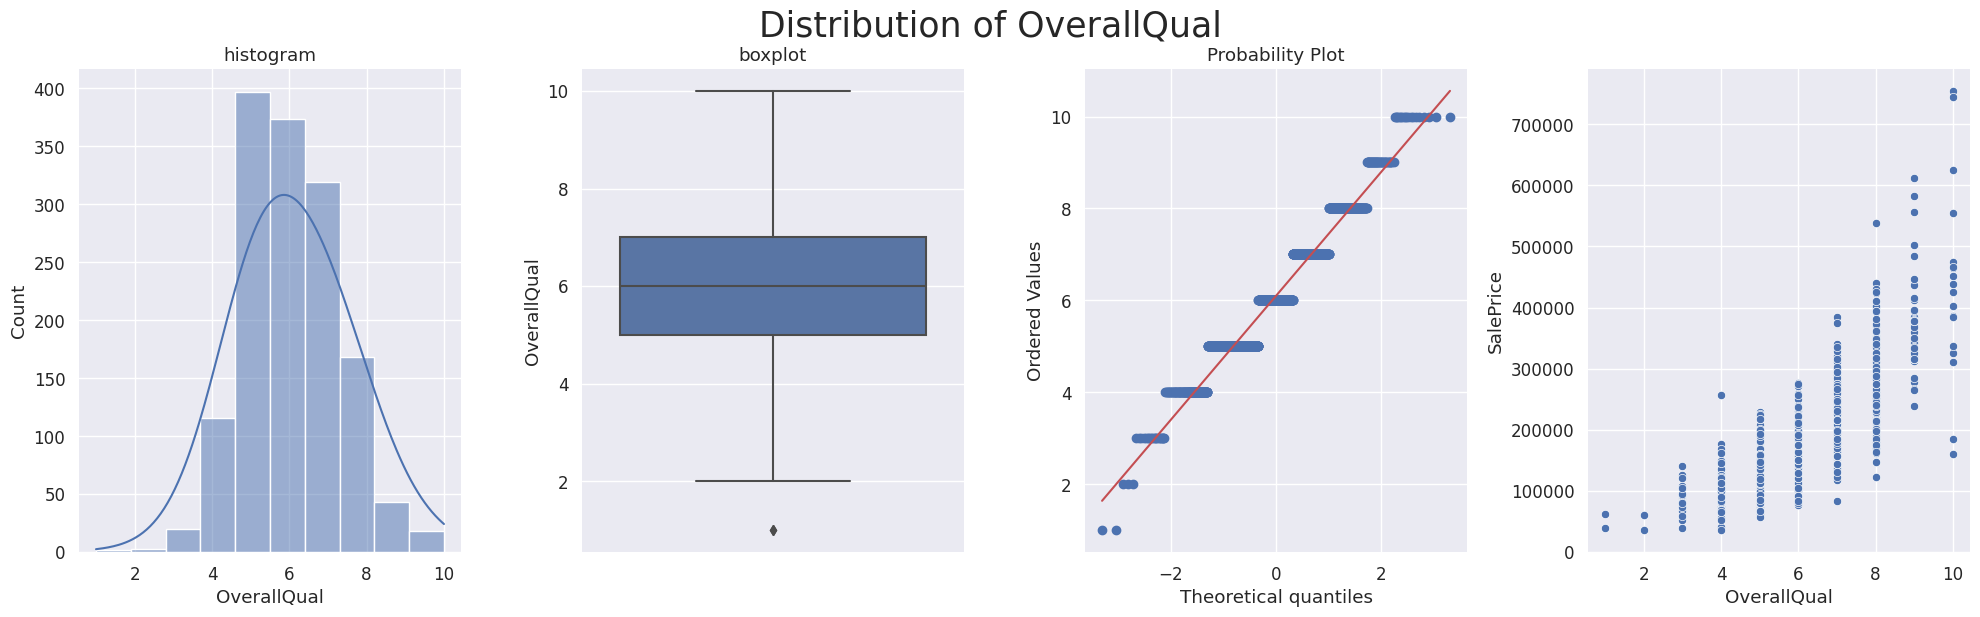

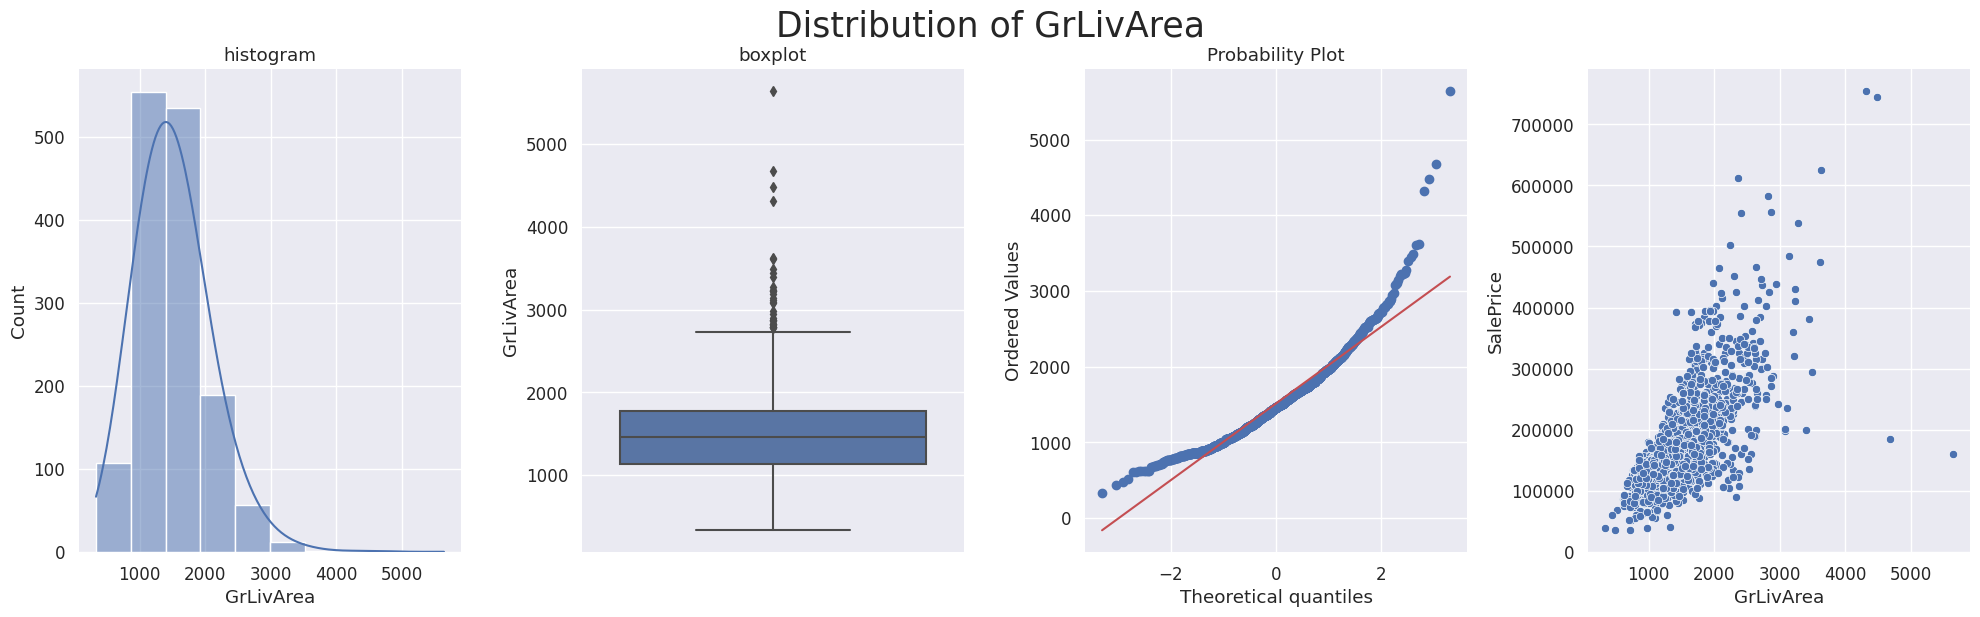

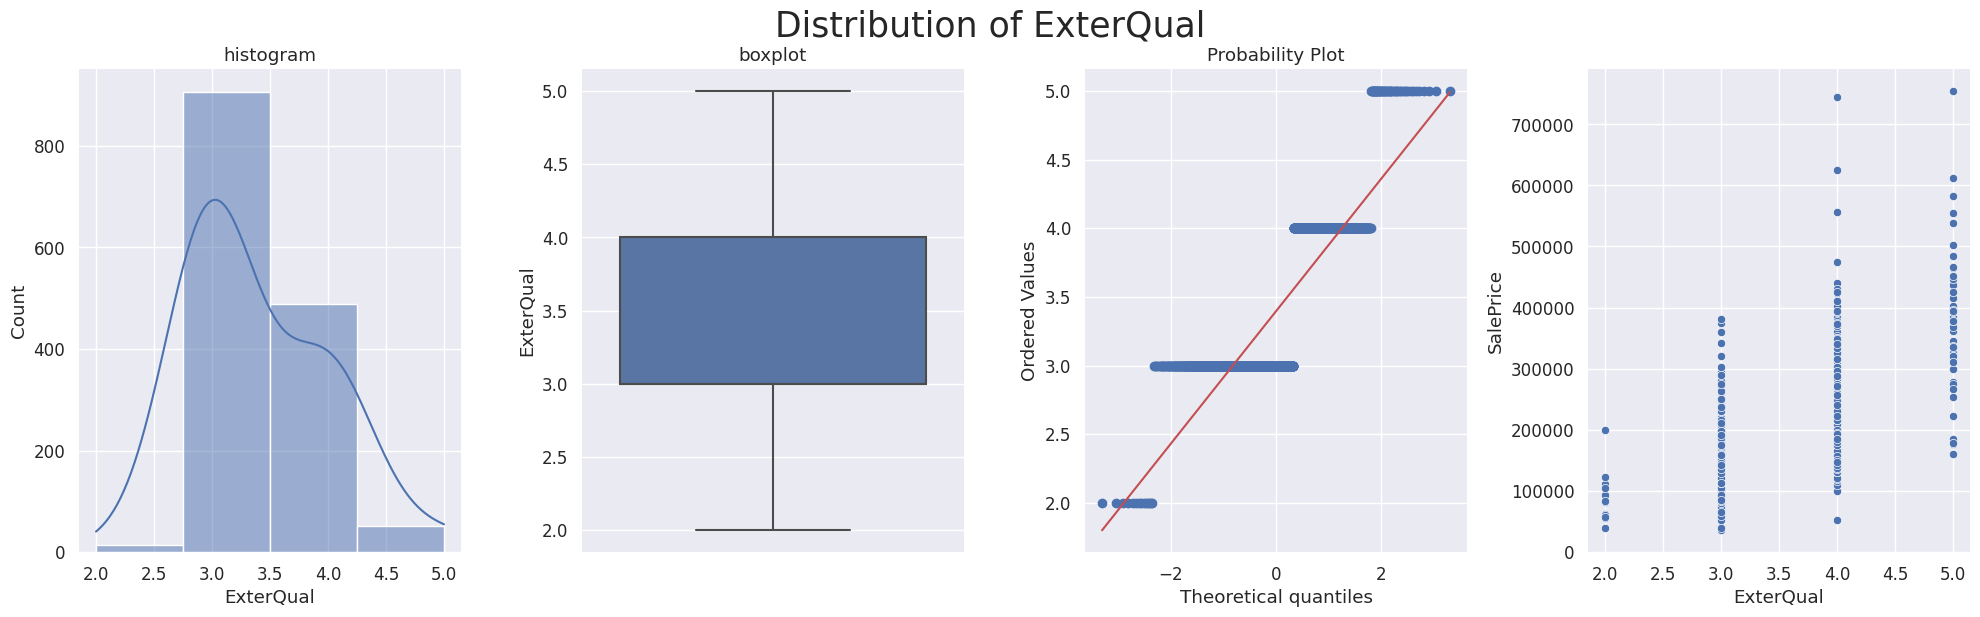

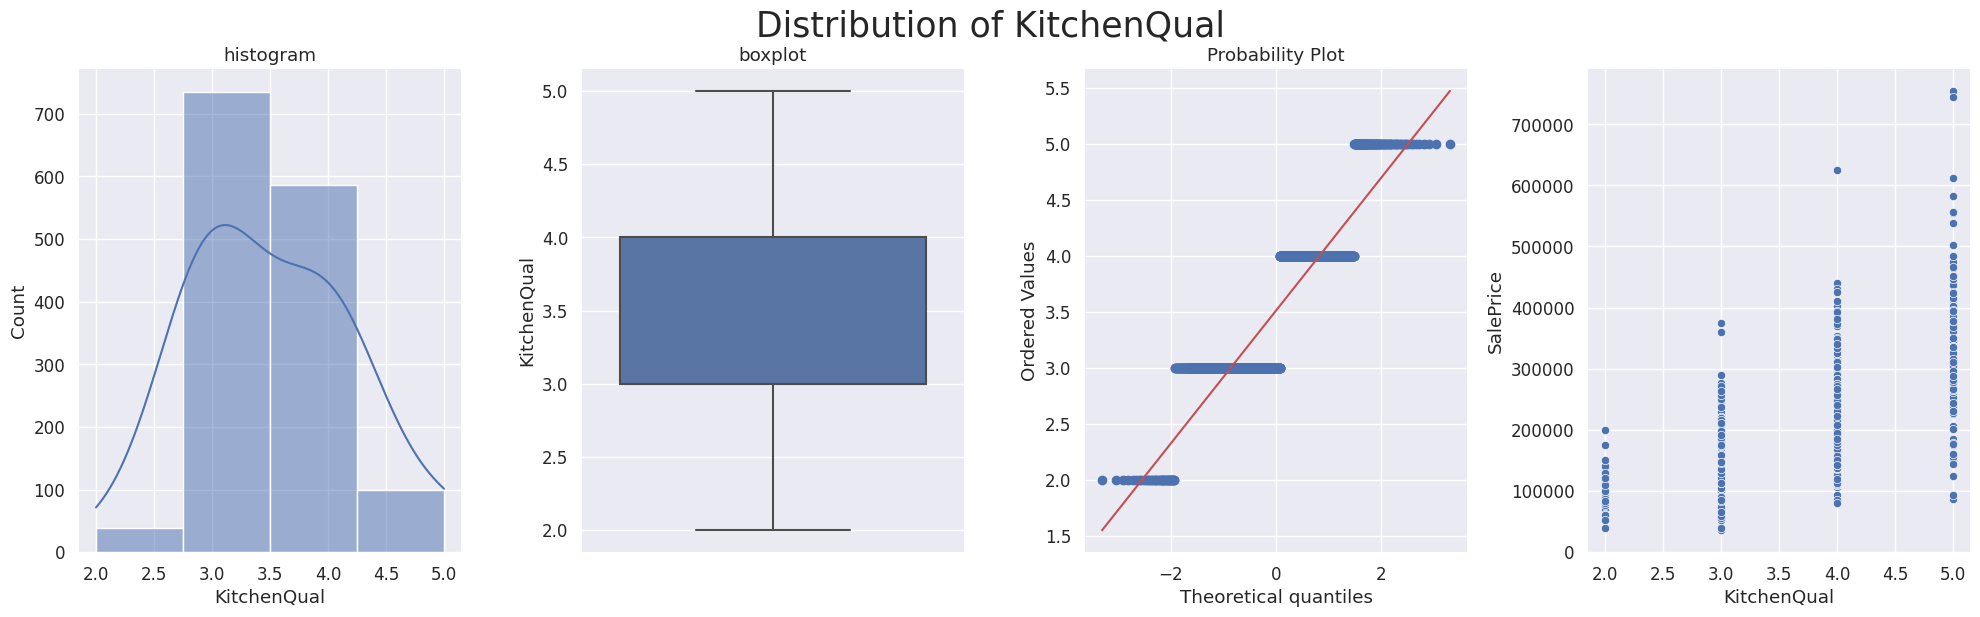

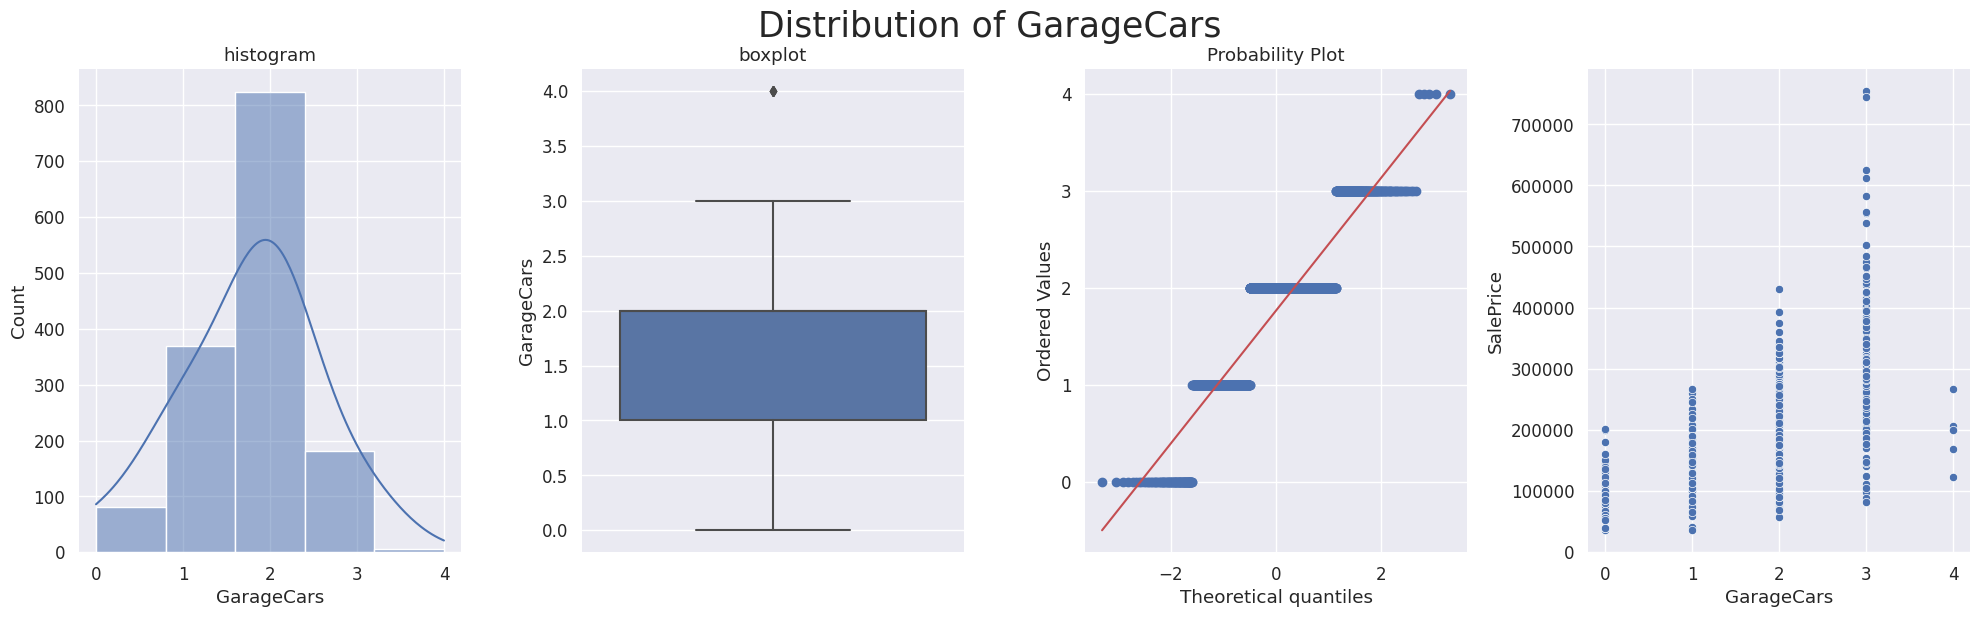

In [56]:
for feature in top_features:
    univariate_numerical_plot(X,feature)

# 6) Feature Selection

In [57]:
X.dtypes.value_counts()

int64      53
object     24
float64     4
dtype: int64

In [58]:
# Categorical columns with low cardinality (number of unique values in a column)
categorical_cols = [cname for cname in X.select_dtypes(["object","category","bool"]).columns
                    if X[cname].nunique() < 30]

# Numerical columns with large correlation with Sales Price
numerical_cols = [cname for cname in X.select_dtypes(['int64', 'float64']).columns
                  if abs(corr_with_price.pearson[cname]) > 0]

# Keep selected columns only
selected_cols = categorical_cols + numerical_cols
X = X[selected_cols]
X_test = X_test[selected_cols]

## Selected Features

In [59]:
# Out of 79 available feature, following number of features will be used for regression
print(len(categorical_cols),len(numerical_cols))

24 57


In [60]:
X.dtypes.value_counts()

int64      53
object     24
float64     4
dtype: int64

In [61]:
# To see which object columns were selected according to max cardinality condition 
# and which numerical columns were selected according to min correlation condition
info = pd.DataFrame(X.dtypes, columns=['Dtype'])
info['Unique'] = X.nunique().values
info['Null'] = X.isnull().sum().values
info.sort_values(['Dtype', 'Unique'])

Dtype  Unique  Null
Remodel          int64       2     0
Garage           int64       2     0
Fireplace        int64       2     0
Bsmt             int64       2     0
Masonry          int64       2     0
BsmtHalfBath     int64       3     0
HalfBath         int64       3     0
LotShape         int64       4     0
ExterQual        int64       4     0
BsmtFullBath     int64       4     0
FullBath         int64       4     0
KitchenAbvGr     int64       4     0
KitchenQual      int64       4     0
Fireplaces       int64       4     0
GarageFinish     int64       4     0
ExterCond        int64       5     0
BsmtQual         int64       5     0
BsmtCond         int64       5     0
HeatingQC        int64       5     0
GarageCars       int64       5     0
YrSold           int64       5     0
FireplaceQu      int64       6     0
GarageQual       int64       6     0
GarageCond       int64       6     0
BsmtFinType1     int64       7     0
BsmtFinType2     int64       7     0
BedroomAbvGr     int64       8     0
PoolArea         int64       8     0
OverallCond      int64       9     0
OverallQual      int64      10     0
TotRmsAbvGrd     int64      12     0
MoSold           int64      12     0
MSSubClass       int64      15     0
3SsnPorch        int64      20     0
MiscVal          int64      21     0
LowQualFinSF     int64      24     0
YearRemodAdd     int64      61     0
AgeRemodel       int64      62     0
ScreenPorch      int64      76     0
YearBuilt        int64     112     0
EnclosedPorch    int64     120     0
Age              int64     122     0
BsmtFinSF2       int64     144     0
OpenPorchSF      int64     202     0
WoodDeckSF       int64     274     0
2ndFlrSF         int64     417     0
GarageArea       int64     441     0
BsmtFinSF1       int64     637     0
TotalBsmtSF      int64     721     0
1stFlrSF         int64     753     0
BsmtUnfSF        int64     780     0
GrLivArea        int64     861     0
LotArea          int64    1073     0
BsmtExposure   float64       4    38
GarageYrBlt    float64      97    81
LotFrontage    float64     110   259
MasVnrArea     float64     327     8
Street          object       2     0
CentralAir      object       2     0
LandSlope       object       3     0
PavedDrive      object       3     0
LandContour     object       4     0
MasVnrType      object       4     8
MSZoning        object       5     0
LotConfig       object       5     0
BldgType        object       5     0
Electrical      object       5     1
RoofStyle       object       6     0
Foundation      object       6     0
Heating         object       6     0
GarageType      object       6    81
SaleCondition   object       6     0
Functional      object       7     0
Condition2      object       8     0
HouseStyle      object       8     0
RoofMatl        object       8     0
Condition1      object       9     0
SaleType        object       9     0
Exterior1st     object      15     0
Exterior2nd     object      16     0
Neighborhood    object      25     0

In [62]:
show_null_values(X, X_test)

Total miising values:
Train Data    476
Test Data     475
dtype: int64


Train Data  Test Data
LotFrontage          259        227
GarageYrBlt           81         78
GarageType            81         76
BsmtExposure          38         44
MasVnrType             8         16
MasVnrArea             8         15
Electrical             1          0
MSZoning               0          4
Functional             0          2
BsmtFullBath           0          2
BsmtHalfBath           0          2
Exterior1st            0          1
Exterior2nd            0          1
SaleType               0          1
BsmtFinSF1             0          1
BsmtFinSF2             0          1
BsmtUnfSF              0          1
TotalBsmtSF            0          1
GarageCars             0          1
GarageArea             0          1

Note: These null values will be imputed by preprocessor in next section

# 7) Model Creation

## Preprocessing

In [63]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [64]:
# Create object of class XGBRegressor
xgb = XGBRegressor()

# Bundle preprocessing and modeling code in a pipeline
regressor = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', xgb)
                     ])

## Visualize Pipeline

In [65]:
from sklearn import set_config
set_config(display='diagram')
regressor

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'LotShape',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'ExterQual',
                                                   'ExterCond', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1', 'BsmtFinSF1',
                                                   'BsmtFinType2', 'BsmtFinSF2',
                                                   'BsmtUnfSF',...
                              gamma=None, gpu_id=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=None,
                              max_leaves=None, min_child_weight=None,
                              missing=nan, monotone_constraints=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, predictor=None,
                              random_state=None, reg_alpha=None,
                              reg_lambda=None, ...))])

## Grid Search & Cross Validation

In [66]:
param_grid = [
    {'model__subsample': [0.5], 'model__n_estimators': [1400, 1500, 1600], 
     'model__max_depth': [5], 'model__learning_rate': [0.02],
     'model__colsample_bytree': [0.4], 'model__colsample_bylevel': [0.5],
     'model__reg_alpha':[2], 'model__reg_lambda': [1]}
]
grid_search = GridSearchCV(regressor, param_grid, cv=5, verbose=1, scoring='neg_mean_absolute_error')

# 8) Training and Testing Model

In [67]:
grid_search.fit(X, y);

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [68]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.831807      0.553609         0.024868        0.002936   
1       9.231800      0.370258         0.024441        0.001326   
2       9.998900      0.565128         0.023126        0.000930   

  param_model__colsample_bylevel param_model__colsample_bytree  \
0                            0.5                           0.4   
1                            0.5                           0.4   
2                            0.5                           0.4   

  param_model__learning_rate param_model__max_depth param_model__n_estimators  \
0                       0.02                      5                      1400   
1                       0.02                      5                      1500   
2                       0.02                      5                      1600   

  param_model__reg_alpha param_model__reg_lambda param_model__subsample  \
0                      2                       1                    0.5   
1                      2                       1                    0.5   
2                      2                       1                    0.5   

                                              params  split0_test_score  \
0  {'model__colsample_bylevel': 0.5, 'model__cols...      -13653.924658   
1  {'model__colsample_bylevel': 0.5, 'model__cols...      -13692.650096   
2  {'model__colsample_bylevel': 0.5, 'model__cols...      -13713.700142   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0      -15643.717064      -15075.608532      -12182.876913      -15154.048106   
1      -15662.434717      -15086.359188      -12177.017110      -15146.022448   
2      -15639.979894      -15077.231954      -12186.132304      -15140.586740   

   mean_test_score  std_test_score  rank_test_score  
0    -14342.035055     1267.069935                1  
1    -14352.896712     1269.037672                3  
2    -14351.526207     1257.388651                2

## Best Parameters:

In [69]:
grid_search.best_params_

{'model__colsample_bylevel': 0.5,
 'model__colsample_bytree': 0.4,
 'model__learning_rate': 0.02,
 'model__max_depth': 5,
 'model__n_estimators': 1400,
 'model__reg_alpha': 2,
 'model__reg_lambda': 1,
 'model__subsample': 0.5}

## Best score in grid search

**Public leader board will have little less Mean Absolute Error than below**, because below error is on validation data when model is trained/fitted on 80% of the training data because of 5-fold cross validation.
Public leaderboard will have error on test data when model is retrained/refitted on 100% of the training data.

In [70]:
print("Mean Absolute Error on validation data:",-grid_search.best_score_)

Mean Absolute Error on validation data: 14342.03505458048


## Perforamnce Evaluation on Training data

In [71]:
y_train_preds = grid_search.predict(X)

Following scores are regarding training data. So, not much useful.

In [72]:
print("Best XGBoost on whole trained data:")
print("Mean Absolute Error:",-grid_search.score(X, y))
RMSE = mean_squared_error(y, y_train_preds, squared=False)
print('Root Mean Squared Error:',round(RMSE))
r2 = r2_score(y, y_train_preds)
print('R² or the coefficient of determination:',round(r2,3))

Best XGBoost on whole trained data:
Mean Absolute Error: 3806.481811857877
Root Mean Squared Error: 4923
R² or the coefficient of determination: 0.996


## Generate test predictions

In [73]:
y_preds = grid_search.predict(X_test)

## Save output to CSV file

In [74]:
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': y_preds.round()})
output.to_csv('submission.csv', index=False)

## Check output format and submit results

In [75]:
output.head(2)

Id  SalePrice
0  1461   131662.0
1  1462   162359.0